In [1]:
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
from dotenv import load_dotenv
import os

In [2]:
data=pd.read_csv(os.getenv('csv_file'))

In [3]:
df =DataFrame(data)

In [4]:
df

,Unnamed: 0,Date Recorded,List Year,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Longitude,Latitude
0,0,2021-04-14,2020,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,-73.068220,41.350140
1,1,2021-05-26,2020,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,-73.084938,41.346439
2,2,2021-09-13,2020,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,Commercial,-73.084938,41.346439
3,3,2020-12-14,2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,-73.084938,41.346439
4,4,2021-09-07,2020,Avon,245 NEW ROAD,217640.0,400000.0,0.5441,Residential,Single Family,-72.830800,41.809500
...,...,...,...,...,...,...,...,...,...,...,...,...
1045447,1054154,2021-11-16,2021,Watertown,50 SUMMIT RIDGE,263100.0,430000.0,0.6118,Residential,Single Family,-73.114797,41.586333
1045448,1054155,2022-09-20,2021,Woodbury,89 TAMARACK LANR UNIT 89A,79810.0,200000.0,0.3990,Residential,Condo,-73.232742,41.517140
1045449,1054156,2022-05-06,2021,Woodbury,69 BACON POND ROAD,79590.0,360000.0,0.2210,Vacant Land,Vacant Land,-73.191290,41.543605
1045450,1054157,2022-06-29,2021,West Haven,114 TUTHILL ST,117600.0,275000.0,0.4276,Residential,Single Family,-72.976177,41.281588


In [5]:
df.isnull().sum()

Unnamed: 0          0
Date Recorded       0
List Year           0
Town                0
Address             0
Assessed Value      0
Sale Amount         0
Sales Ratio         0
Property Type       0
Residential Type    0
Longitude           0
Latitude            0
dtype: int64

In [6]:
year_grp=df.groupby('List Year').agg({
    'Assessed Value':'mean',
    'Sale Amount':'mean',
    'Sales Ratio':'mean'
})

In [7]:
year_grp_sale_ratio=year_grp['Sales Ratio']

In [8]:
year_grp_sale_ratio

List Year
2001     3.516619
2002     4.105300
2003     2.769931
2004     9.304382
2005    76.911471
2006    52.490152
2007     2.063655
2008     1.599390
2009     2.224514
2010     2.383394
2011     2.735291
2012     2.121198
2013     2.385467
2014     1.666184
2015     3.950036
2016     1.755611
2017     2.265927
2018     9.356018
2019     1.132344
2020     0.824280
2021     1.242021
Name: Sales Ratio, dtype: float64

In [9]:
year_grp['Sale Amount']

List Year
2001    246434.000170
2002    296633.539361
2003    327441.100477
2004    381085.439804
2005    364415.261731
2006    476245.777696
2007    437407.345665
2008    326326.583564
2009    356624.984000
2010    332584.872762
2011    392492.256278
2012    396396.591433
2013    414652.613887
2014    401833.573526
2015    346612.399332
2016    508993.402687
2017    393803.081027
2018    384709.669470
2019    421161.753439
2020    606371.953507
2021    538181.246338
Name: Sale Amount, dtype: float64

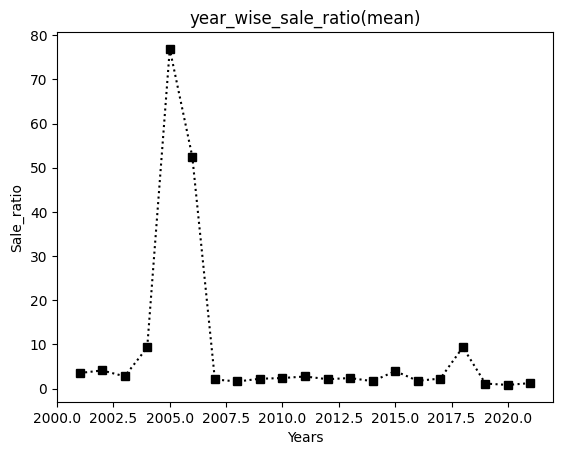

In [10]:
#line Chart
plt.plot(year_grp_sale_ratio,'s:k')
plt.xlabel("Years")
plt.ylabel('Sale_ratio')
plt.title('year_wise_sale_ratio(mean)')
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

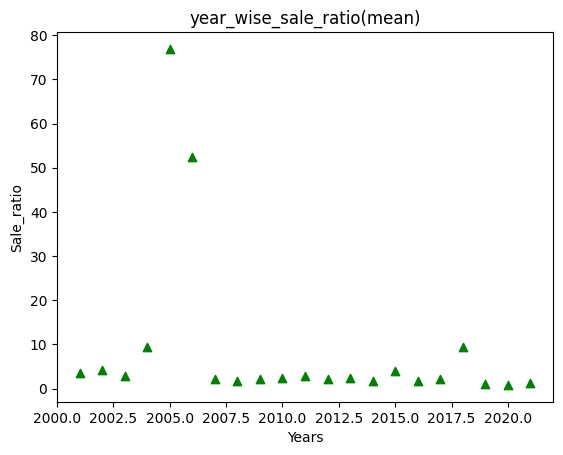

In [11]:
#scatter plot

plt.scatter(year_grp_sale_ratio.index,year_grp_sale_ratio, marker="^", c='g')
plt.xlabel("Years")
plt.ylabel('Sale_ratio')
plt.title('year_wise_sale_ratio(mean)')
plt.show

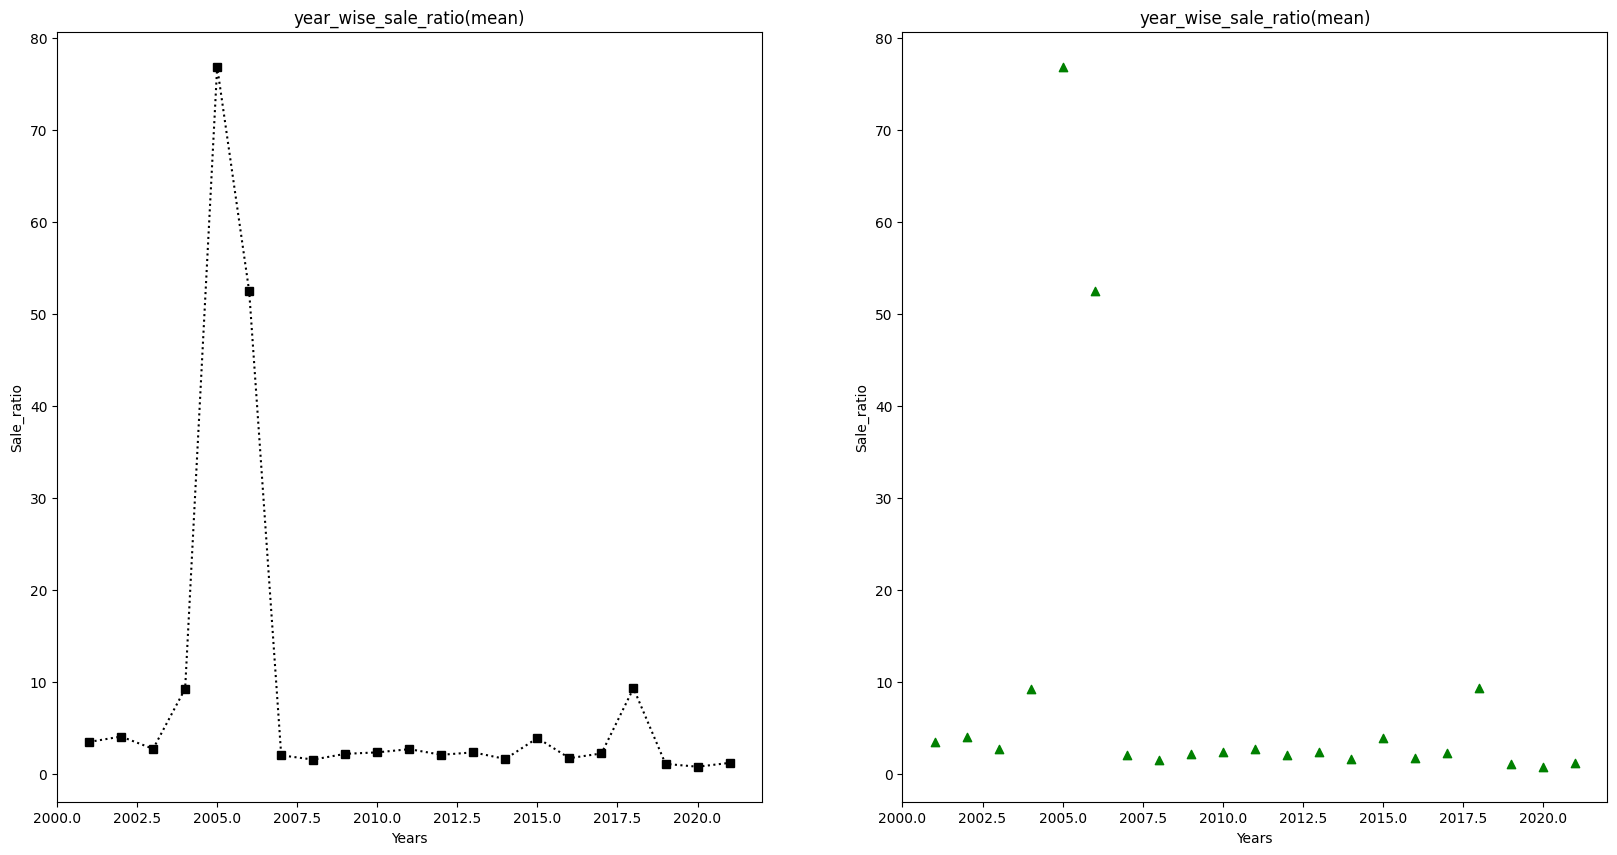

In [44]:
#line and Scatter plot in one fig
plt.figure(figsize=(20,10))
plt.subplot(1,2,1)
plt.plot(year_grp_sale_ratio,'s:k')
plt.xlabel("Years")
plt.ylabel('Sale_ratio')
plt.title('year_wise_sale_ratio(mean)')
plt.subplot(1,2,2)
plt.scatter(year_grp_sale_ratio.index,year_grp_sale_ratio, marker="^", c='g')
plt.xlabel("Years")
plt.ylabel('Sale_ratio')
plt.title('year_wise_sale_ratio(mean)')
plt.show()


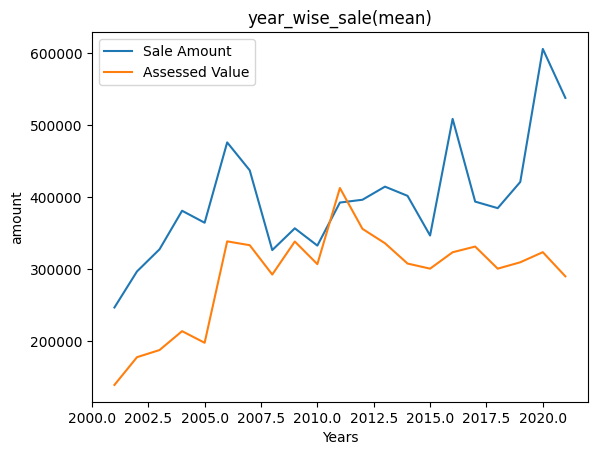

In [13]:
#comparison line plot
plt.plot(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.plot(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()
plt.show()

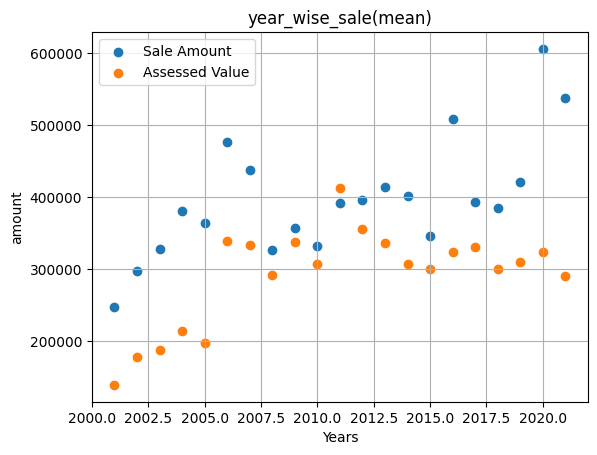

In [14]:
#comparison Scatter plot
plt.scatter(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.scatter(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()
plt.grid()
plt.show()

In [15]:
#Town wise filter
Town_wise =df.groupby('Town').agg({
    'Assessed Value':'mean',
    'Sale Amount':'mean',
    'Sales Ratio':'mean'
})

In [16]:
Town_wise

,Assessed Value,Sale Amount,Sales Ratio
Town,,,
Andover,135471.581921,220720.976215,0.775606
Ansonia,133344.356932,213299.857874,0.895716
Ashford,125568.295538,207915.416262,0.892616
Avon,298795.705077,471551.253638,0.995565
Barkhamsted,140490.309783,224633.005580,0.986524
...,...,...,...
Windsor Locks,167985.371908,277270.869526,0.717548
Wolcott,151065.874443,233942.677602,0.853089
Woodbridge,301711.921073,463704.591767,1.023962


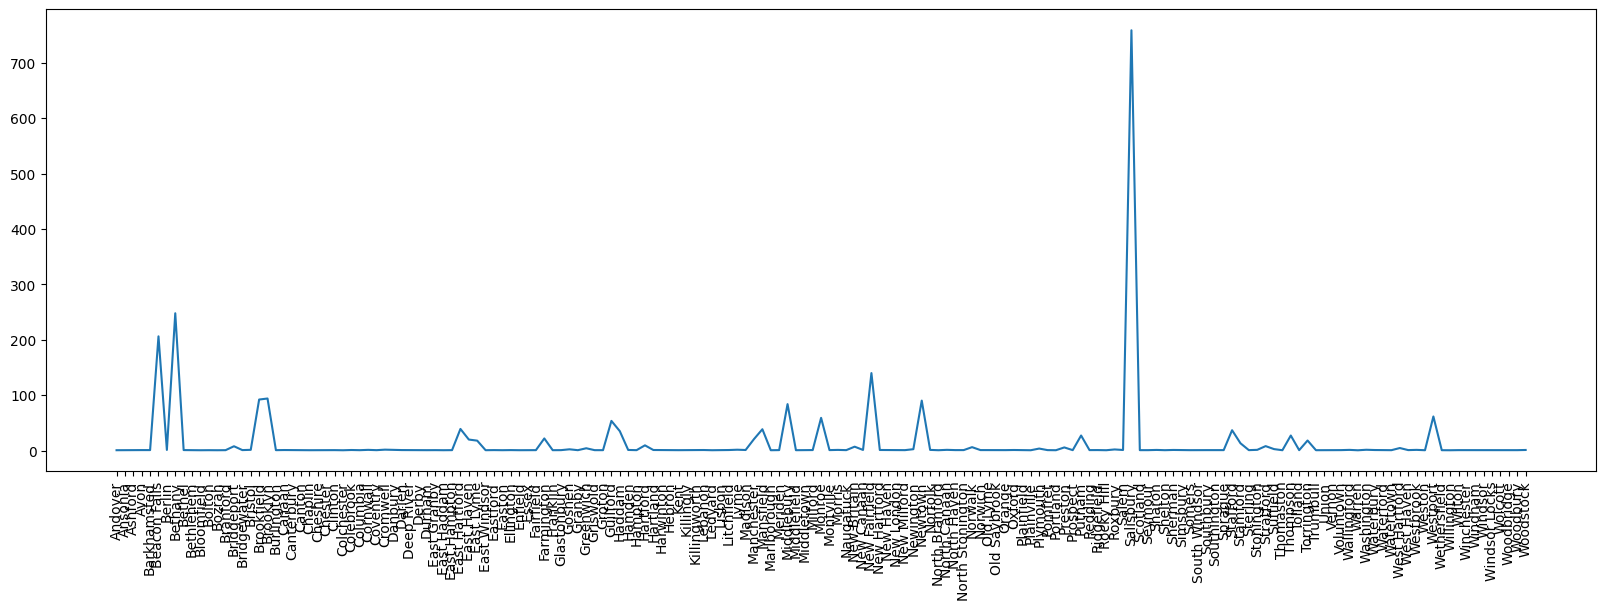

In [17]:
#Town wise line plot
plt.figure(figsize=(20, 6))
plt.plot(Town_wise.index,Town_wise['Sales Ratio'])
plt.xticks(rotation=90)
plt.show()

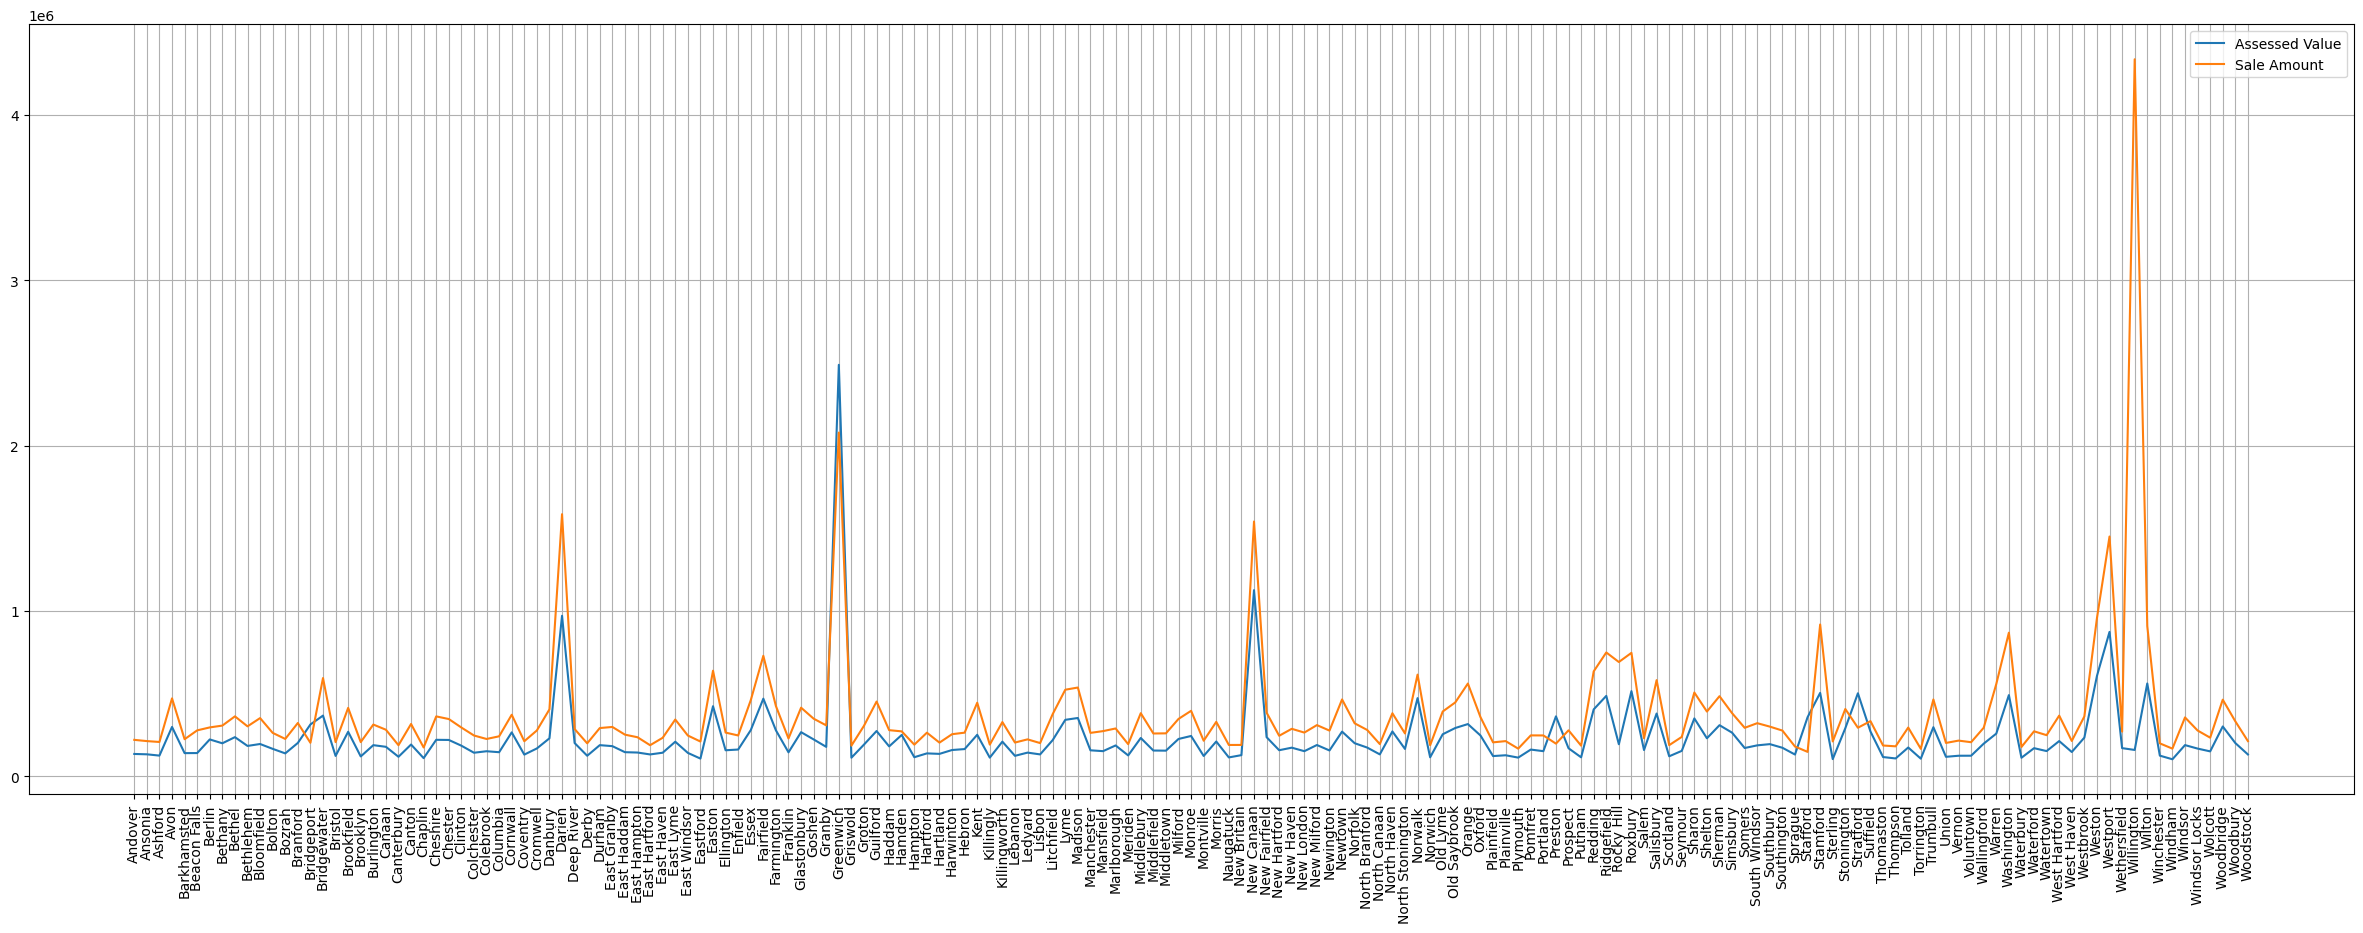

In [18]:
#town wise comparison line plot
plt.figure(figsize=(30,10))
plt.plot(Town_wise.index,Town_wise['Assessed Value'],label='Assessed Value')
plt.plot(Town_wise.index,Town_wise['Sale Amount'],label='Sale Amount')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [19]:
#Town wise max values filter
Town_wise_max =df.groupby('Town').agg({
    'Assessed Value':'max',
    'Sale Amount':'max',
    'Sales Ratio':'max'
})

In [20]:
Town_wise_max

,Assessed Value,Sale Amount,Sales Ratio
Town,,,
Andover,592000.0,995000.0,10.883333
Ansonia,8799500.0,14000000.0,100.650000
Ashford,2685900.0,4381522.0,54.341667
Avon,14432179.0,29000000.0,469.370000
Barkhamsted,1045580.0,2220000.0,41.684000
...,...,...,...
Windsor Locks,56350000.0,55000000.0,43.999200
Wolcott,2401490.0,4718000.0,80.480000
Woodbridge,7499870.0,14867298.0,108.267477


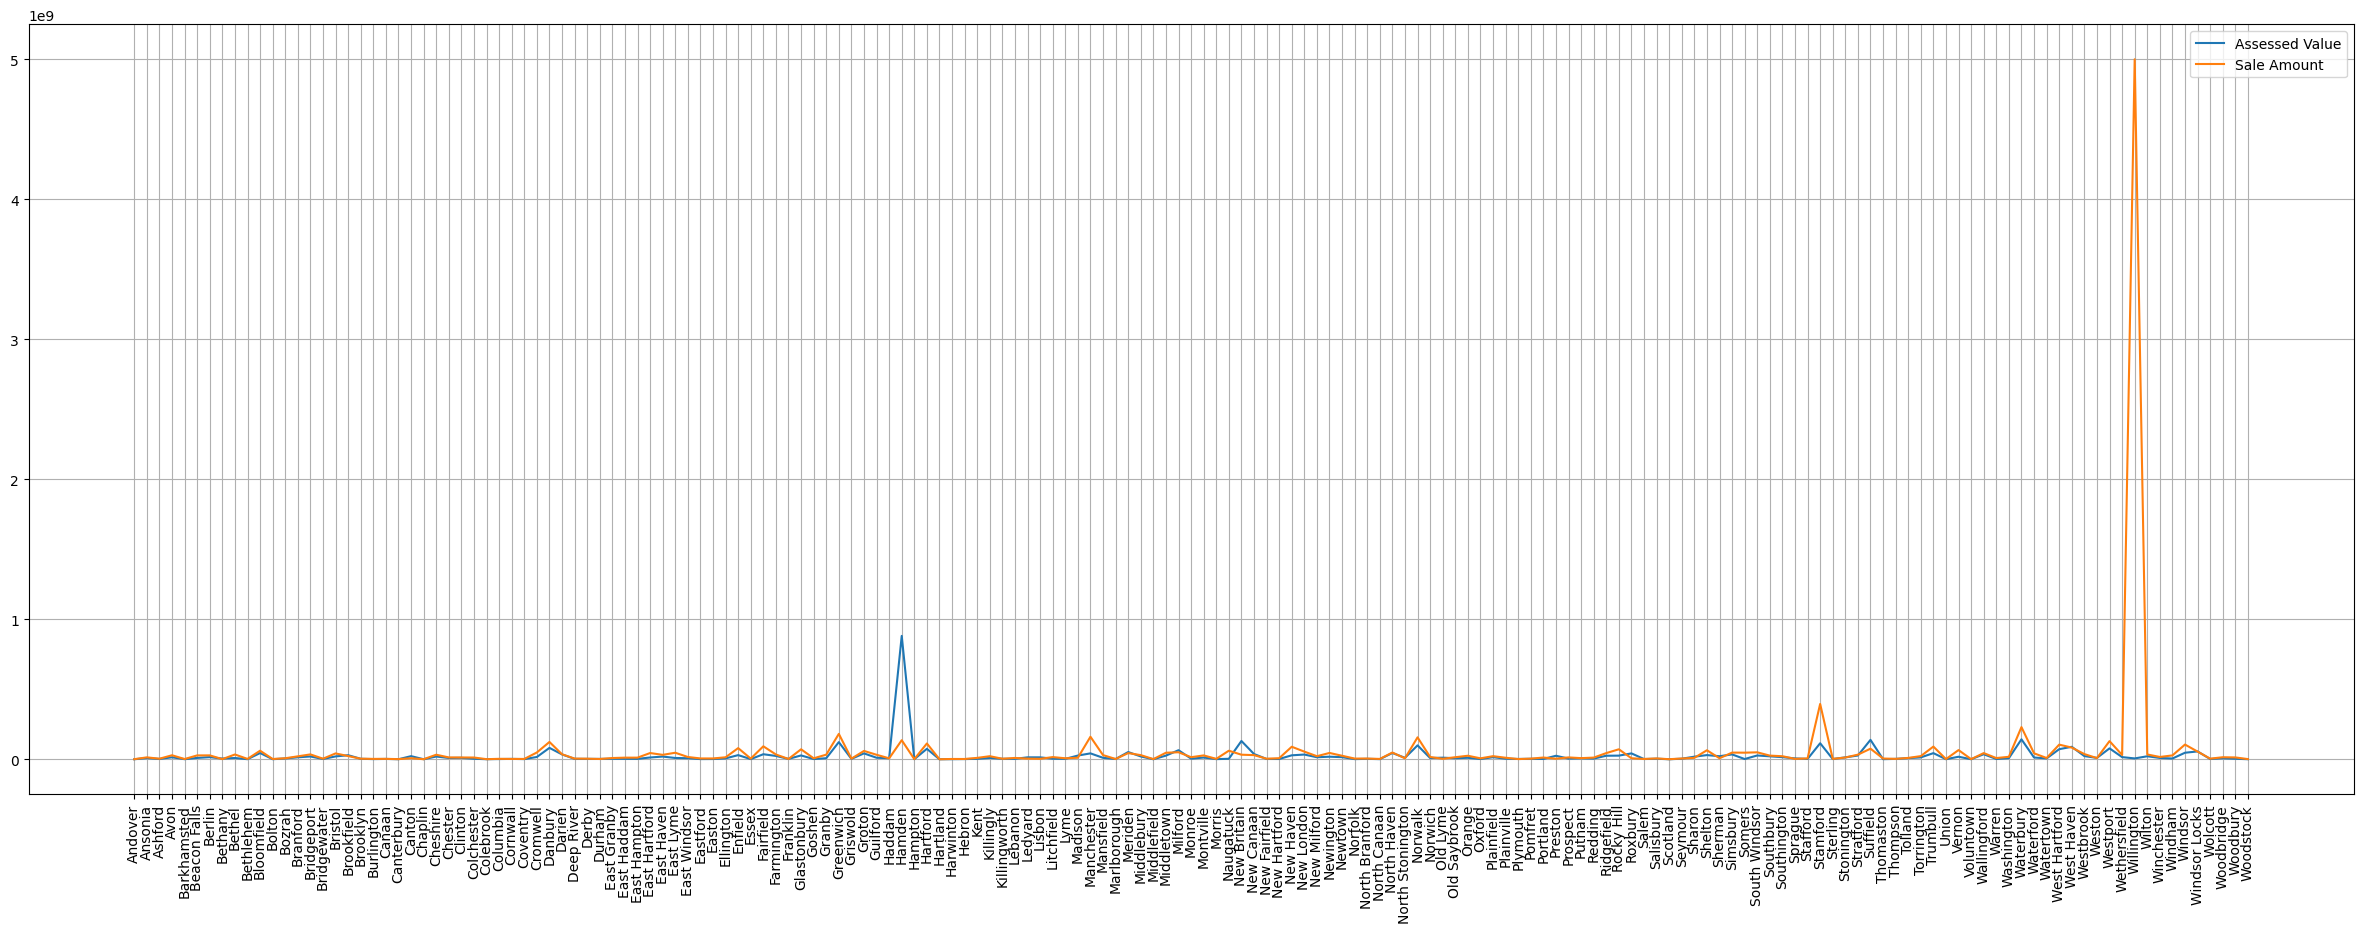

In [21]:
#Max value comparison plot
plt.figure(figsize=(30,10))
plt.plot(Town_wise_max.index,Town_wise_max['Assessed Value'],label='Assessed Value')
plt.plot(Town_wise_max.index,Town_wise_max['Sale Amount'],label='Sale Amount')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

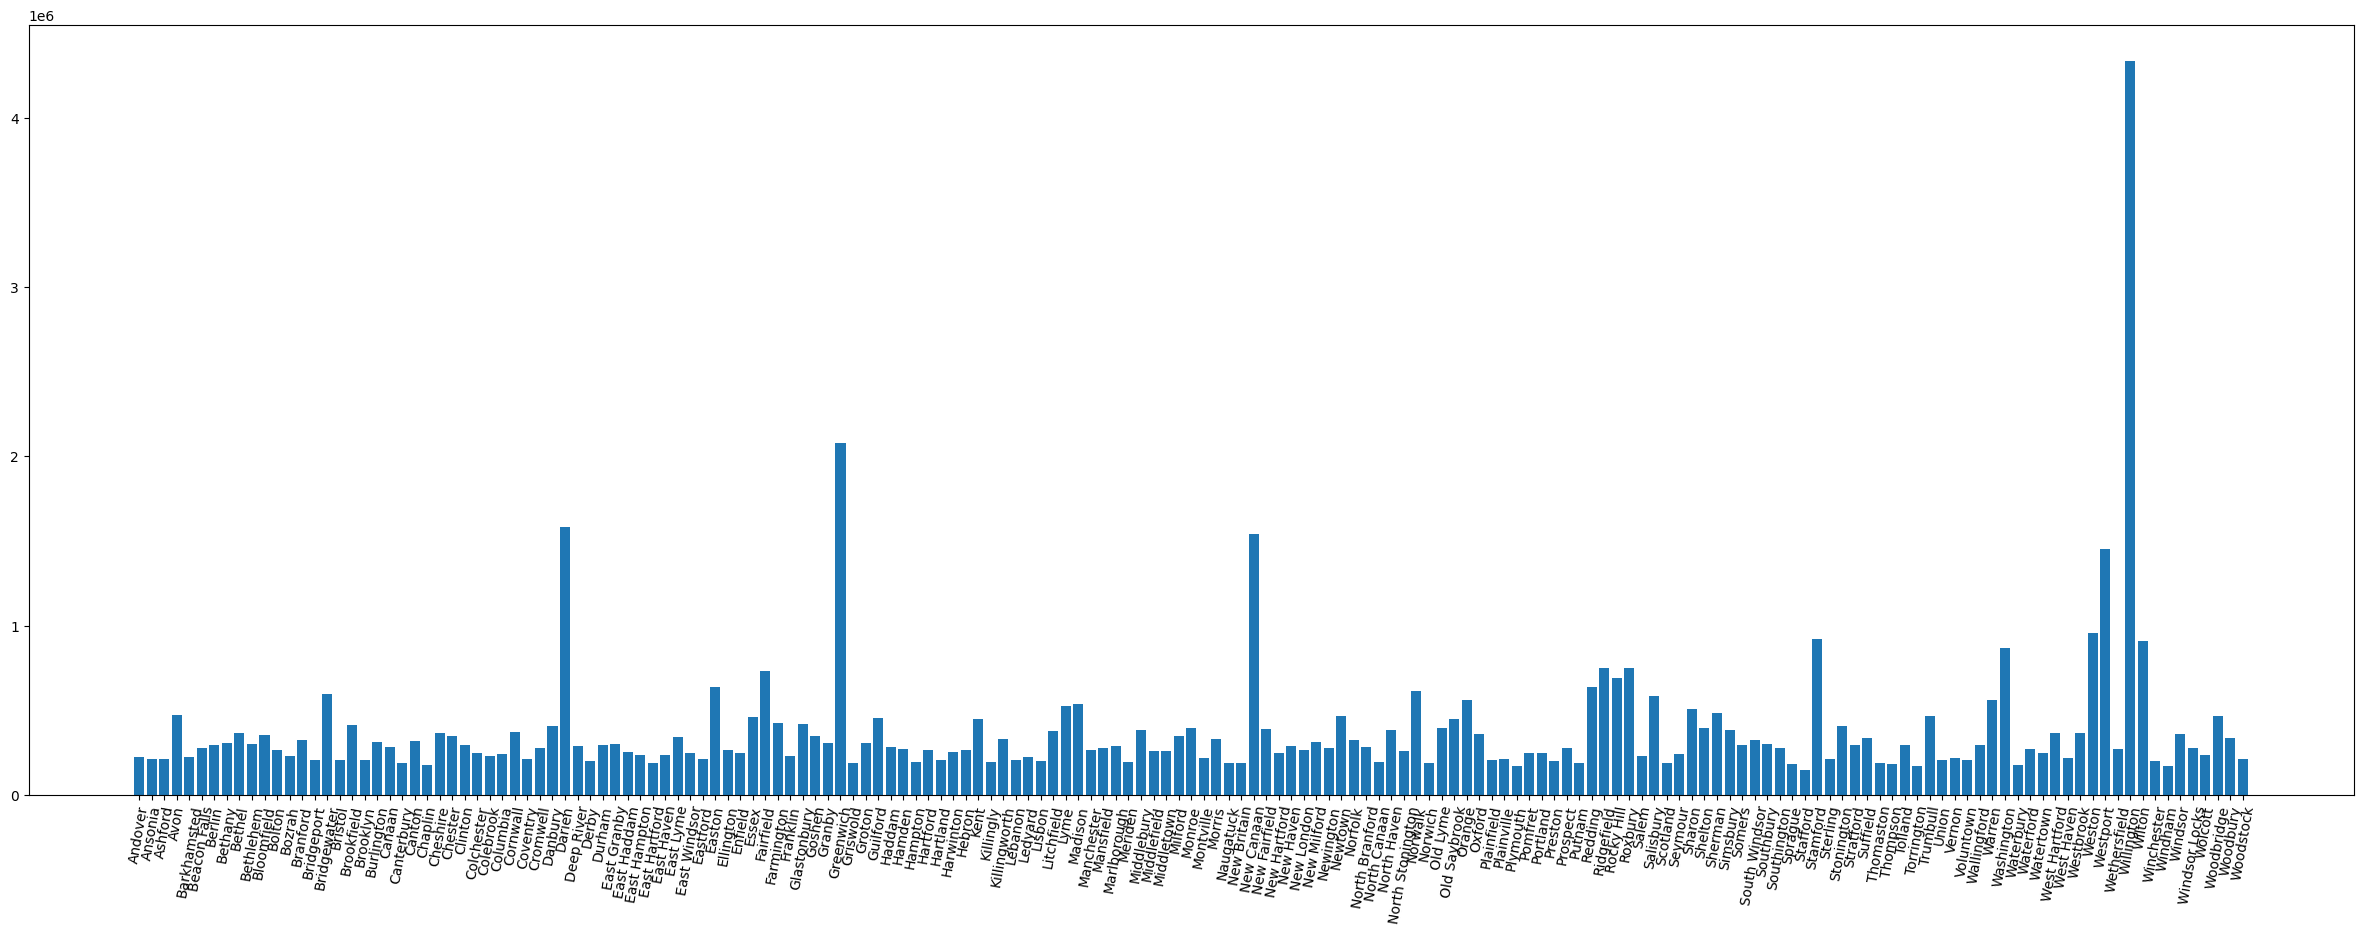

In [46]:
#bar chart town wise
plt.figure(figsize=(30,10))
plt.bar(Town_wise.index,Town_wise['Sale Amount'])
plt.xticks(rotation=80)
plt.show()

In [23]:
# Town_wise min values
Town_wise_min =df.groupby('Town').agg({
    'Assessed Value':'min',
    'Sale Amount':'min',
    'Sales Ratio':'min'
})

In [24]:
Town_wise_min

,Assessed Value,Sale Amount,Sales Ratio
Town,,,
Andover,0.0,0.0,0.0
Ansonia,0.0,0.0,0.0
Ashford,0.0,0.0,0.0
Avon,0.0,1000.0,0.0
Barkhamsted,0.0,1100.0,0.0
...,...,...,...
Windsor Locks,0.0,0.0,0.0
Wolcott,0.0,0.0,0.0
Woodbridge,0.0,2000.0,0.0


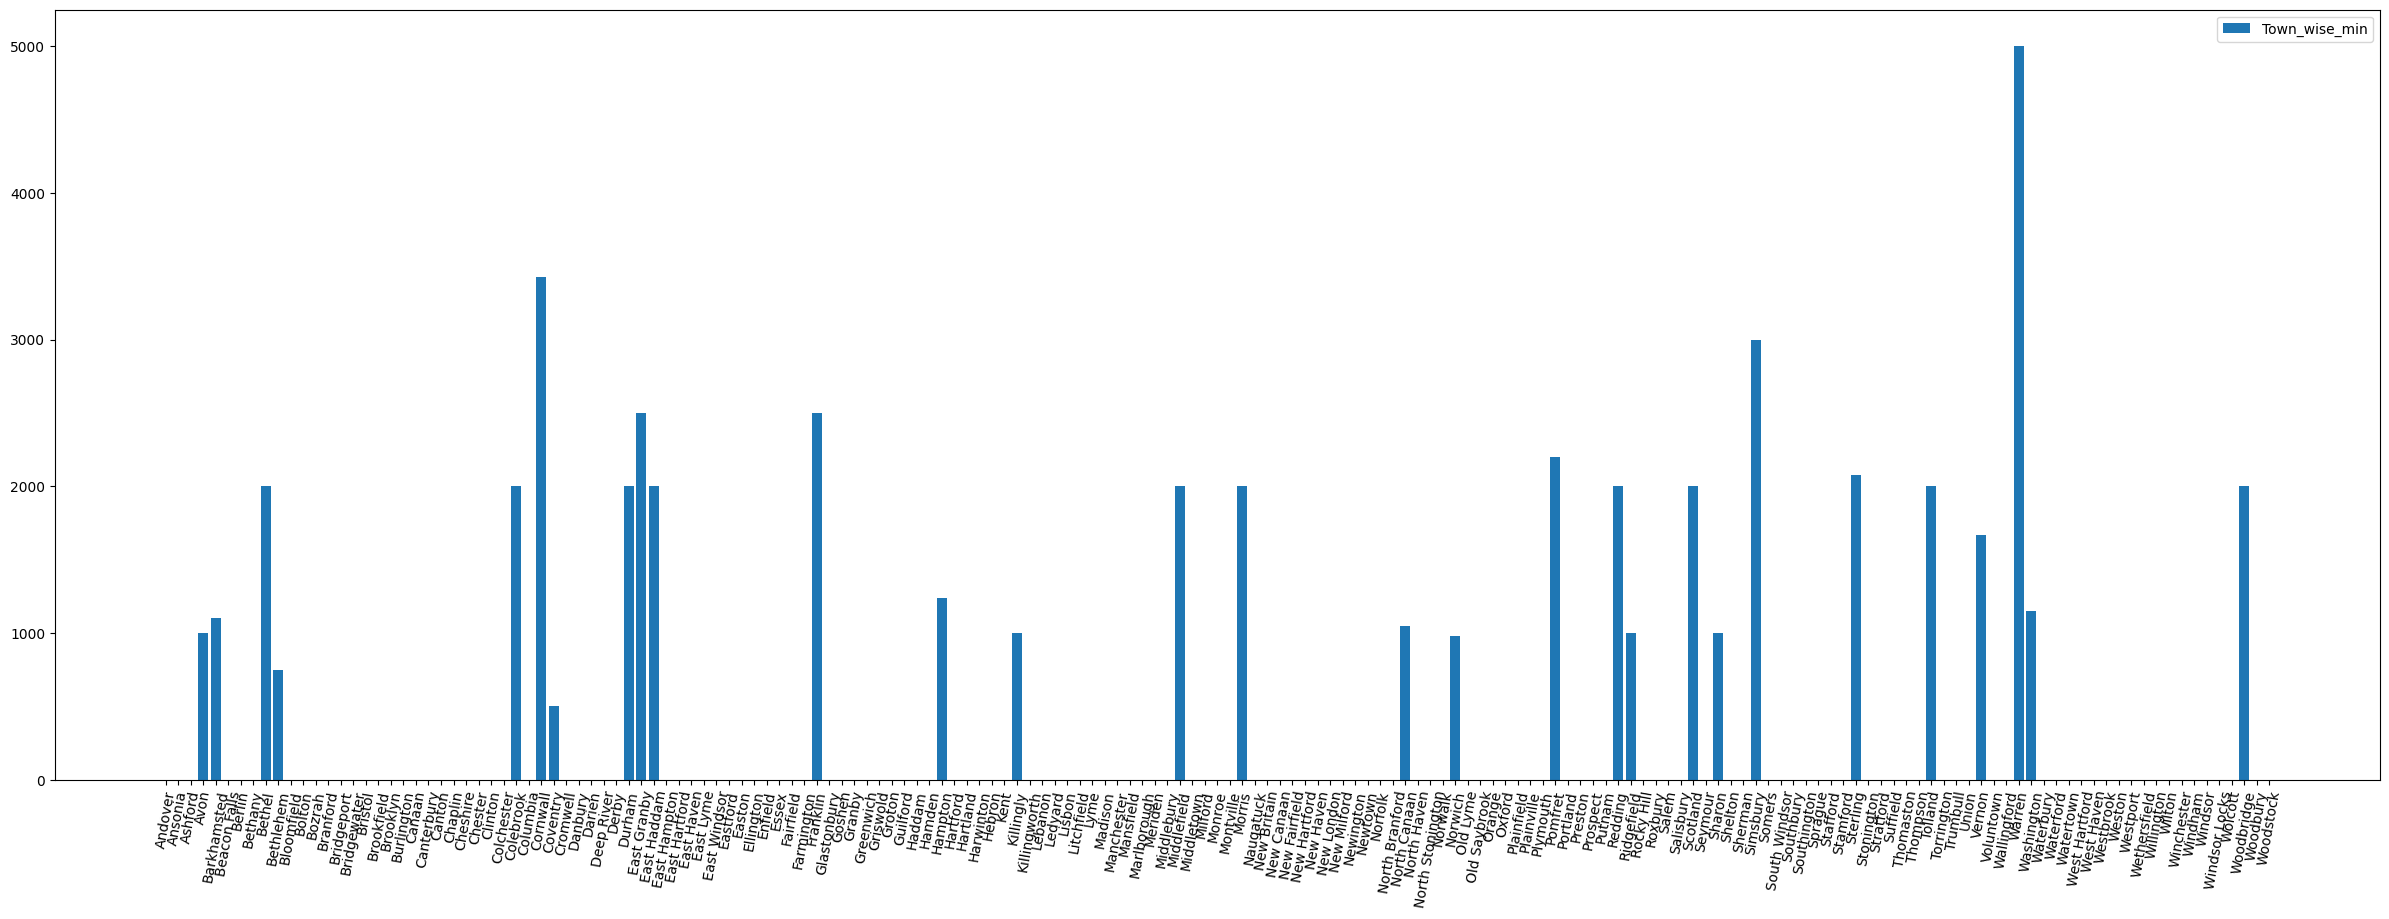

In [25]:
#Town wise min bar plot
plt.figure(figsize=(30,10))
# plt.bar(Town_wise_max.index,Town_wise_max['Sale Amount'],label='Town_wise_max')
plt.bar(Town_wise_min.index,Town_wise_min['Sale Amount'],label='Town_wise_min')
plt.xticks(rotation=80)
plt.legend()
plt.show()

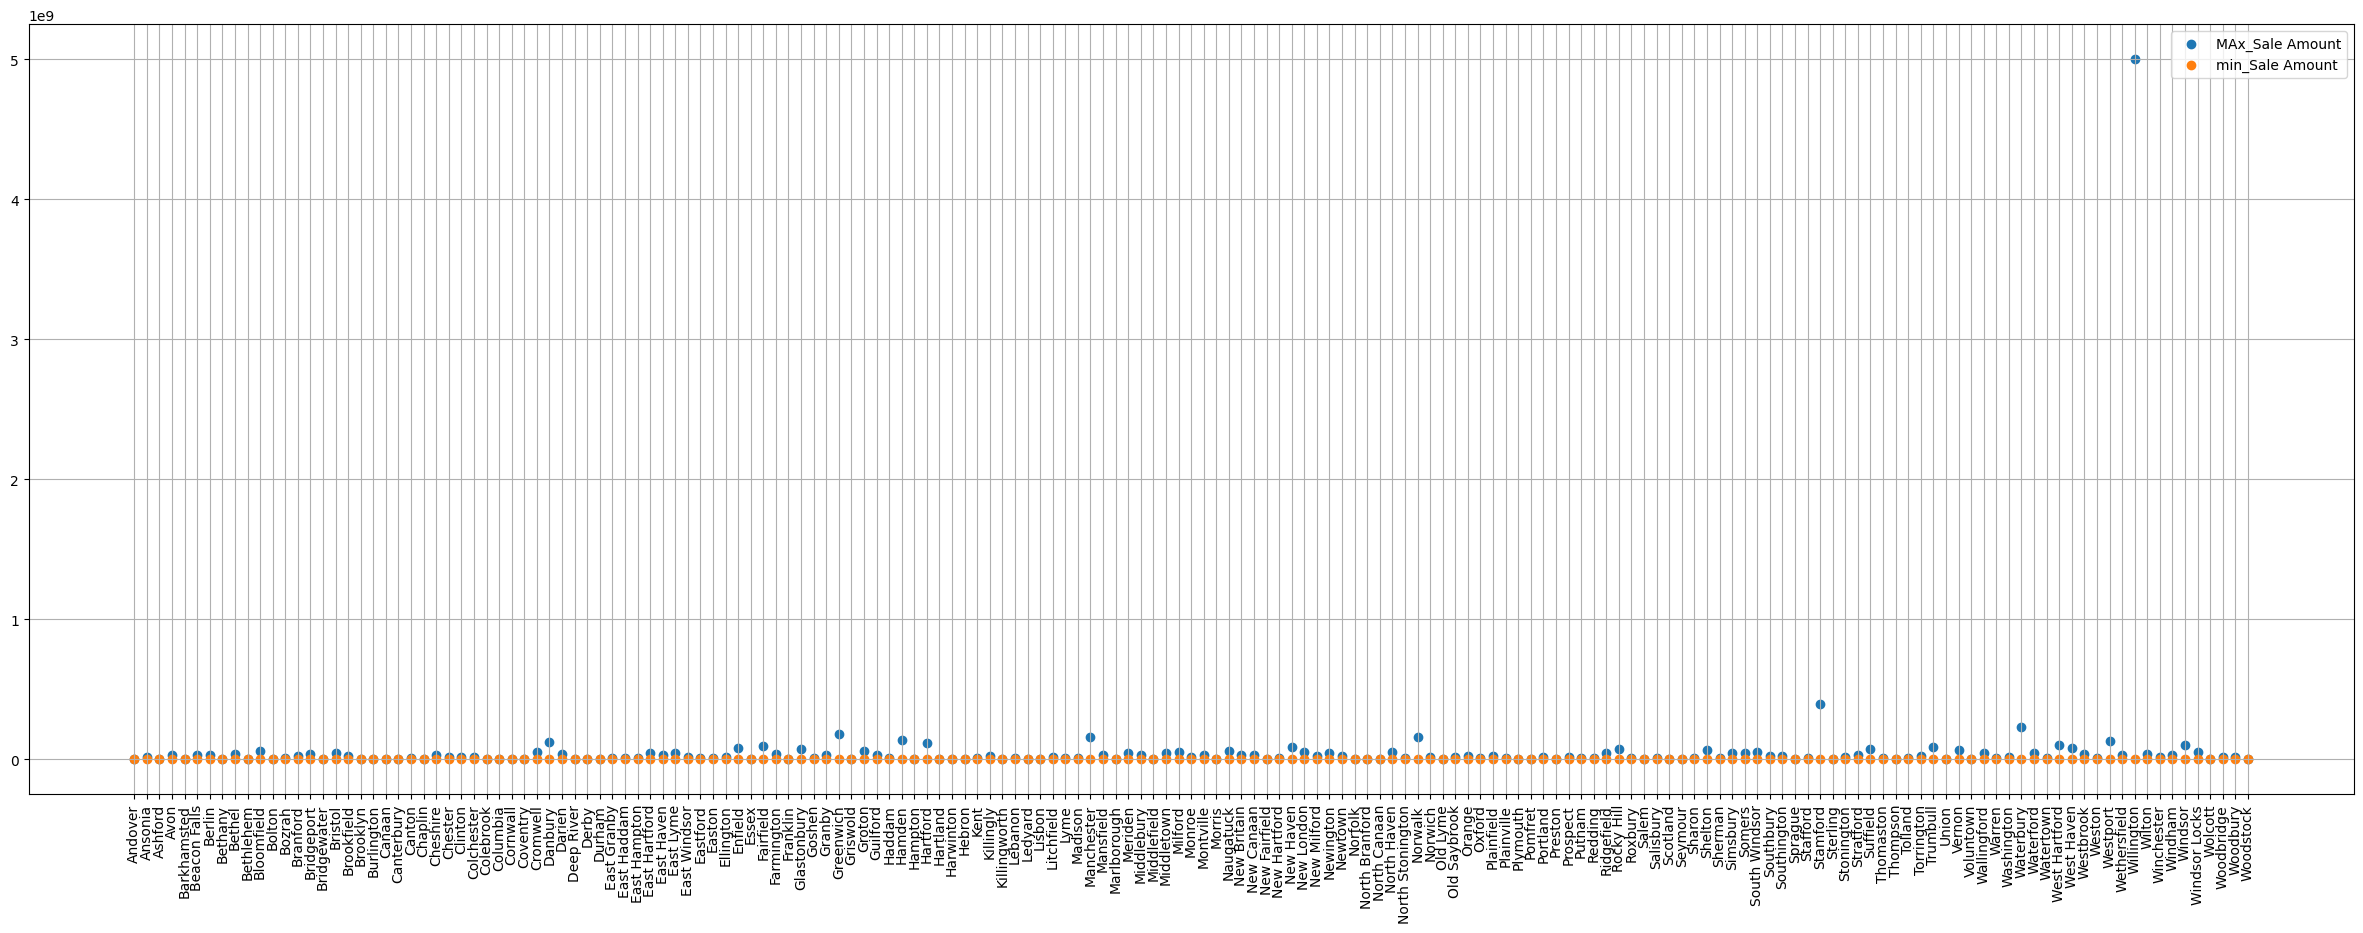

In [26]:
#scatter plot 
plt.figure(figsize=(30,10))
plt.scatter(Town_wise_max.index,Town_wise_max['Sale Amount'],label='MAx_Sale Amount')
plt.scatter(Town_wise_min.index,Town_wise_min['Sale Amount'],label='min_Sale Amount')
plt.legend()
plt.xticks(rotation=90)
plt.grid()
plt.show()

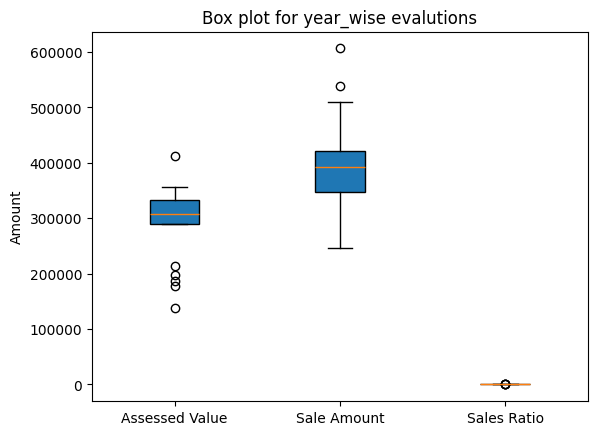

In [27]:
#box plot year_grp mean
plt.boxplot(year_grp,patch_artist=True,tick_labels=year_grp.columns)
plt.ylabel('Amount')
plt.title('Box plot for year_wise evalutions')
plt.show()

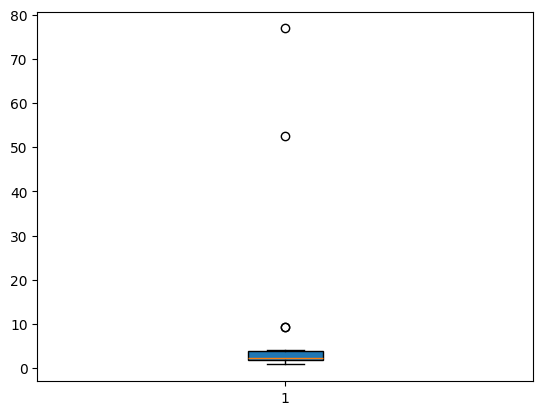

In [28]:
 #box plot year_grp mean sales ratio
plt.boxplot(year_grp['Sales Ratio'],patch_artist=True)
plt.show()

In [29]:
#standard deviation on property types
property_grp=df.groupby('Property Type').agg({
    'Assessed Value':'std',
    'Sale Amount':'std',
})

In [30]:
property_grp.columns

Index(['Assessed Value', 'Sale Amount'], dtype='object')

In [31]:
property_grp

,Assessed Value,Sale Amount
Property Type,,
Commercial,4.907762e+06,7.361605e+06
Industrial,3.256284e+06,6.458839e+06
Public Utility,4.760201e+04,4.788062e+05
Residential,1.629814e+06,5.246575e+06
Vacant Land,6.724485e+05,3.750450e+06


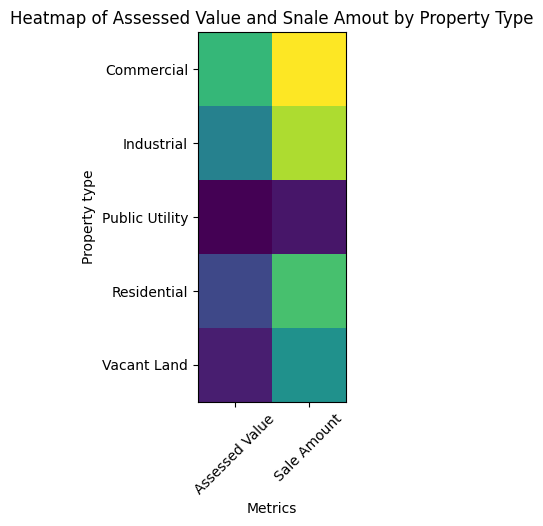

In [32]:
#Heatmap of Assessed Value and Snale Amout by Property Type
plt.imshow(property_grp)
plt.title('Heatmap of Assessed Value and Snale Amout by Property Type')
plt.ylabel('Property type')
plt.xlabel('Metrics')
plt.yticks(np.arange(len(property_grp.index)), property_grp.index)
plt.xticks(np.arange(len(property_grp.columns)), property_grp.columns,rotation=45)
plt.show()

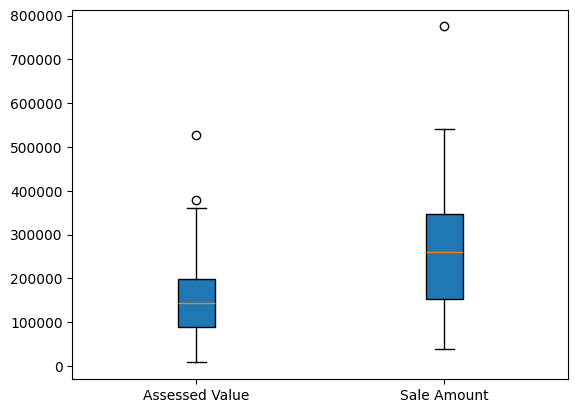

In [33]:
#box plot for Assessed value and sale amount of first 50 values mean
plt.boxplot(df[['Assessed Value','Sale Amount']].head(50),patch_artist=True,tick_labels=['Assessed Value','Sale Amount'])
plt.show()

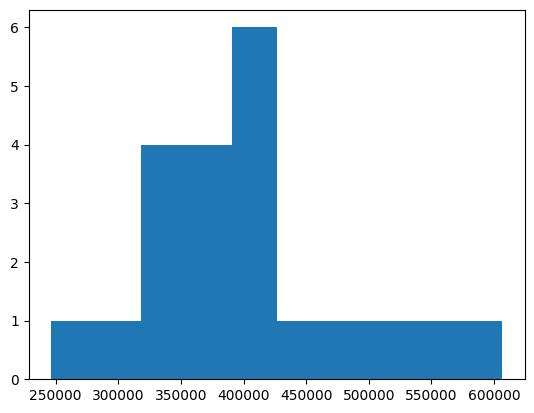

In [34]:
#sales mean per year
plt.hist(year_grp['Sale Amount'])
plt.show()

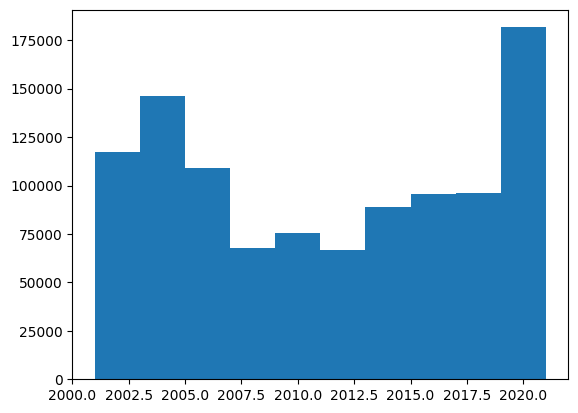

In [35]:
#yearwise data in dataframe
plt.hist(df['List Year'])
plt.show()

Pie chart on property type

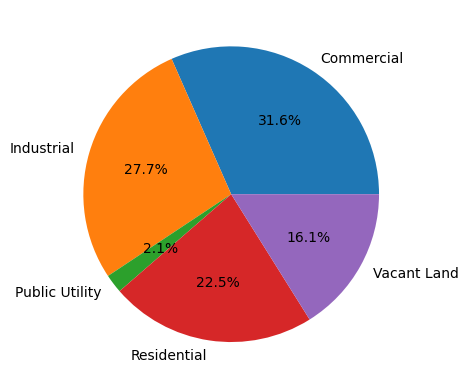

In [36]:
plt.pie(property_grp['Sale Amount'],labels=property_grp.index,autopct='%1.1f%%')
plt.show()

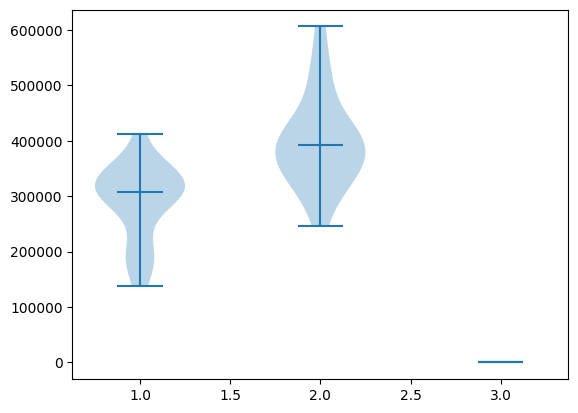

In [37]:
#voilin chart
plt.violinplot(year_grp,showmedians=True)
plt.show()

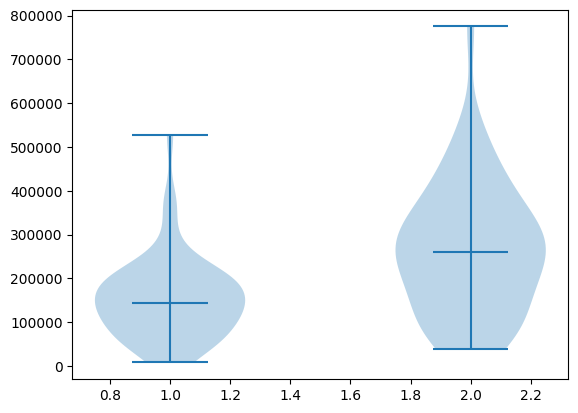

In [38]:
#voilin plot for Assessed value and sale amount of first 50 values mean
plt.violinplot(df[['Assessed Value','Sale Amount']].head(50),showmedians=True)
plt.show()

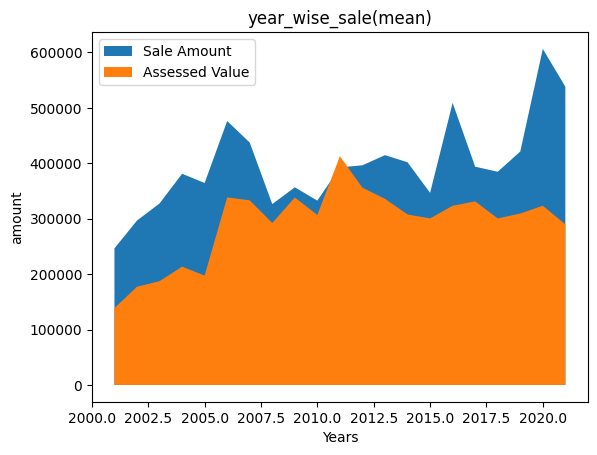

In [39]:
#area plot
plt.fill_between(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.fill_between(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()
plt.show()

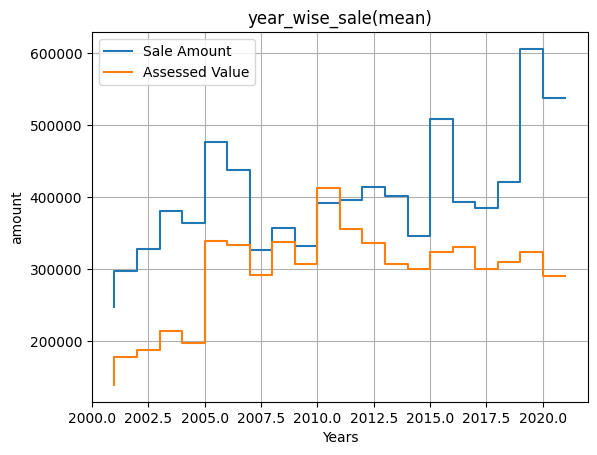

In [40]:
#step plot
plt.step(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.step(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()
plt.grid()
plt.show()

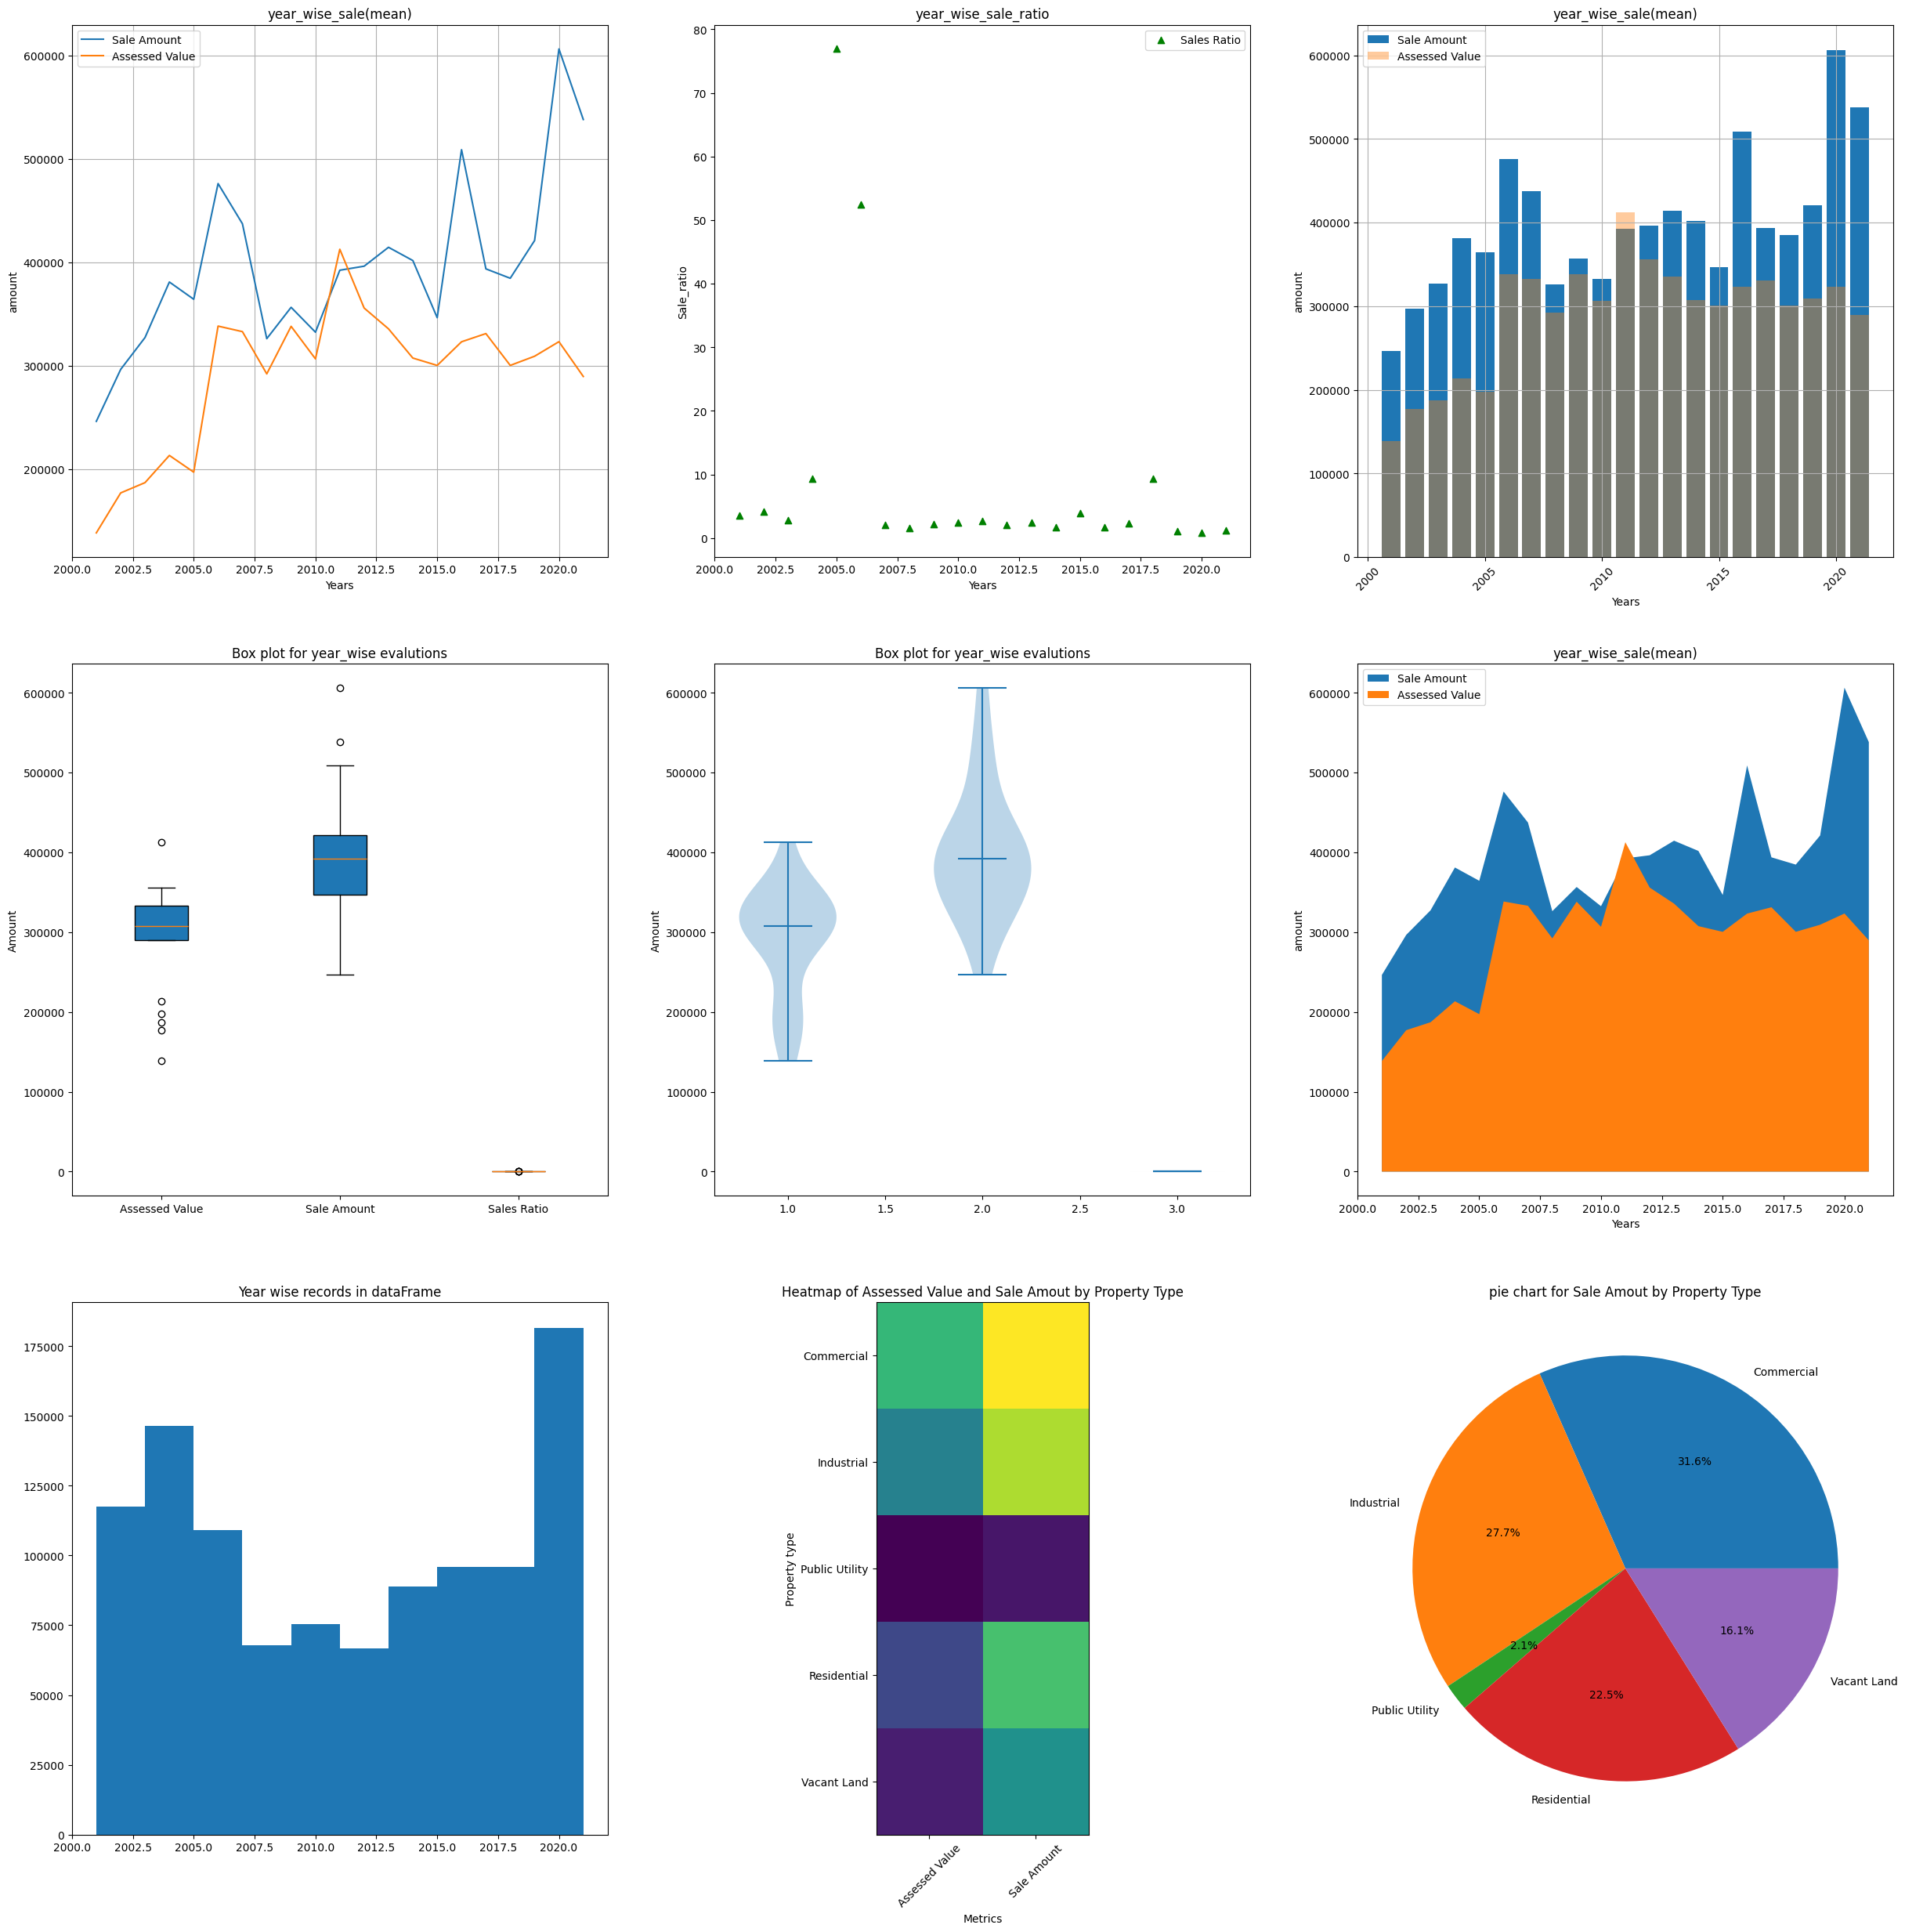

In [41]:
#all plots in one figure using subplot
plt.figure(figsize=(30,30))
plt.subplot(3,3,1)
plt.plot(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.plot(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.grid()
plt.legend()

plt.subplot(3,3,2)
plt.scatter(year_grp_sale_ratio.index,year_grp_sale_ratio, marker="^", c='g',label='Sales Ratio')
plt.xlabel("Years")
plt.ylabel('Sale_ratio')
plt.legend()
plt.title('year_wise_sale_ratio')

plt.subplot(3,3,3)
plt.bar(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.bar(year_grp.index,year_grp['Assessed Value'],label='Assessed Value',alpha=0.4)
plt.xticks(rotation=45)
plt.grid()
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()


plt.subplot(3,3,4)
#box plot year_grp mean
plt.boxplot(year_grp,patch_artist=True,tick_labels=year_grp.columns)
plt.ylabel('Amount')
plt.title('Box plot for year_wise evalutions')


plt.subplot(3,3,5)
plt.violinplot(year_grp,showmedians=True)
plt.ylabel('Amount')
plt.title('Box plot for year_wise evalutions')



plt.subplot(3,3,6)
#area plot
plt.fill_between(year_grp.index,year_grp['Sale Amount'],label='Sale Amount')
plt.fill_between(year_grp.index,year_grp['Assessed Value'],label='Assessed Value')
plt.xlabel("Years")
plt.ylabel('amount')
plt.title('year_wise_sale(mean)')
plt.legend()


plt.subplot(3,3,7)
#yearwise data in dataframe
plt.hist(df['List Year'])
plt.title('Year wise records in dataFrame')

plt.subplot(3,3,8)
plt.imshow(property_grp)
plt.title('Heatmap of Assessed Value and Sale Amout by Property Type')
plt.ylabel('Property type')
plt.xlabel('Metrics')
plt.yticks(np.arange(len(property_grp.index)), property_grp.index)
plt.xticks(np.arange(len(property_grp.columns)), property_grp.columns,rotation=45)

plt.subplot(3,3,9)
plt.pie(property_grp['Sale Amount'],labels=property_grp.index,autopct='%1.1f%%')
plt.title('pie chart for Sale Amout by Property Type')


plt.savefig('real_estate.jpeg', format='jpeg', dpi=300)
plt.show()
 